# shape systematics

In order to assess the effect of various shape systematics, I will take the approach of identifying the sources of such uncertainties and then characterize how much the various distributions that are fitted are affected.  This approach will be based on the prescriptions put forth by Conway (arXiv:1103.0354).  The basic idea is to vary parameter $\theta$ within its prior uncertainty, $\sigma_{\theta}$, and derive modifications to the efficiency in bin $i$.  That is, given some nominal efficiency, $\epsilon^{0}_{ij}$, for process $j$, we find $\epsilon^{\pm}_{ij}$ and then parameterize the bin content as,

$$
\epsilon_{ij} = \epsilon^{0}_{ij} + f\frac{\epsilon^{+}_{ij} + \epsilon^{-}_{ij}}{2}.
$$

This expression gives us a linear approximation of the effect of varying the nuisance parameter.  A quadratic construction is,

$$
\epsilon_{ij} = \frac{f(f - 1)}{2}\epsilon^{-}_{ij} + (f - 1)(f + 1)\epsilon^{0}_{ij} + \frac{f(f + 1)}{2}\epsilon^{+}_{ij}.
$$

Conway suggests using the quadratic form for $|f| < 1$ and then using the linear expression for $|f| \geq 1$. The important, part is that we determine what $\epsilon^{\pm}_{ij}$ are.  We will first consider the effect of uncertainty on weighting of events due to pileup.

In [2]:
# imports and configuration
%cd /home/naodell/work/wbr/analysis

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('default')

import scripts.plot_tools as pt
import scripts.systematic_tools as st

/home/naodell/work/wbr/analysis


In [27]:
# Get the data (unbinned)
### get the data and prepare labels
datasets    = ['ttbar_inclusive', 't_tw', 'tbar_tw',             
               #'zjets_m-50',  'zjets_m-10to50',  
               ] 

selection = 'mumu'
dm = pt.DataManager(input_dir     = f'data/flatuples/single_lepton_test/{selection}_2016',
                    dataset_names = datasets,
                    selection     = selection,
                    period        = 2016,
                    scale         = 35.9e3,
                    cuts          = ''#pt.cuts[selection]
                   )
brange = (-0.5, 4.5)
nbins = 5

Loading dataframes: 100%|███████████████| 3.00/3.00 [00:01<00:00, 2.02it/s]


# jet systematics

Given the analysis requires at least two jets and is binned in the number of b tags, the effect of uncertainties of the jets on the branching fractions should be considered.  The main sources to consider are:

   * jet energy scale
   * jet energy resolution
   * b tag efficiency scale factor
   * mistag efficiency scale factors
   
The first two uncertainty sources affect the overall number of events that are accepted, whereas all of these will cause migration between b tag multiplicity bins.  This is obviously the case for the efficiency scale factors; the jet energy uncertainty impacts the b tag multiplicity due to the pt dependence of the scale factors.

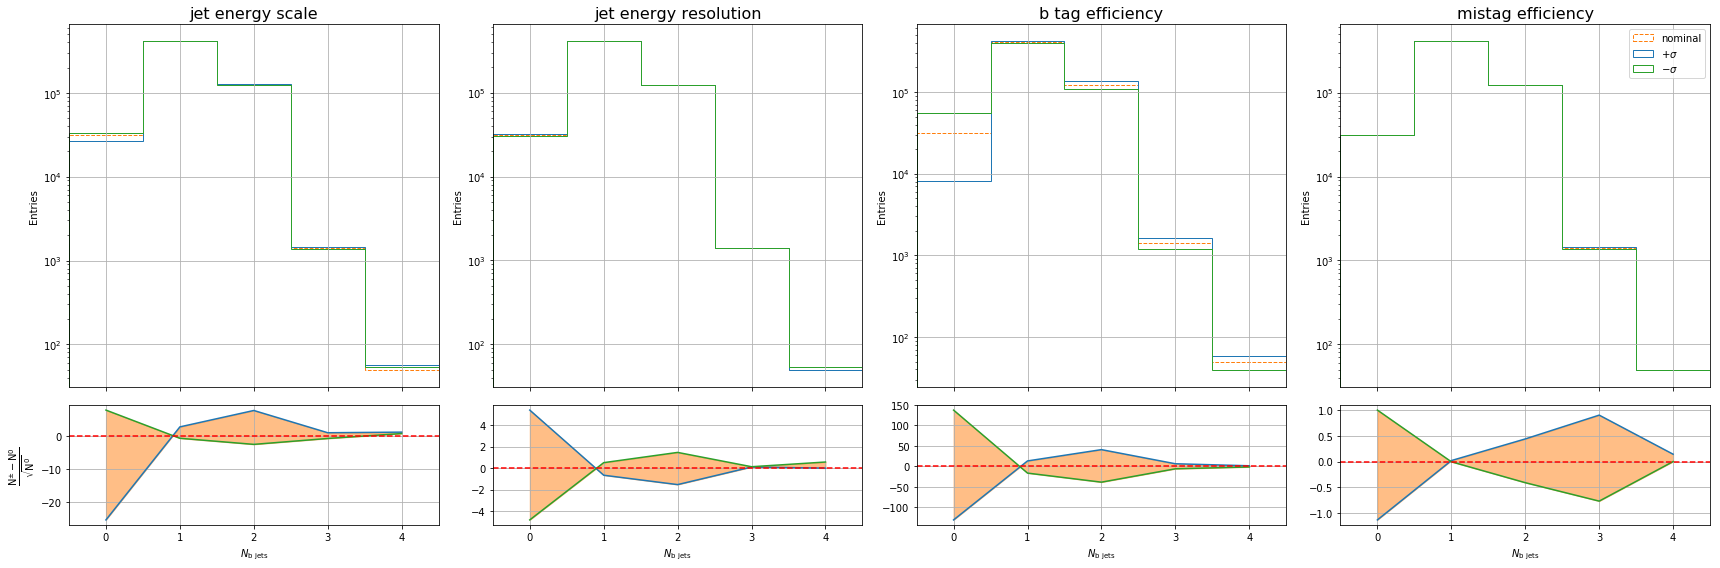

In [29]:
# make plots of the b tag multiplicity for each of the 4 variations
df = dm.get_dataframe('ttbar')

fig, axes = plt.subplots(2, 4, figsize=(24, 8), facecolor='white', sharex='col', gridspec_kw={'height_ratios':[3,1]})
fig.subplots_adjust(hspace=0)

# JES
ax = axes[0][0]
h_nominal, b, _ = ax.hist(df.n_bjets, range=brange, bins=nbins, color='C1', linestyle='--', histtype='step')
h_plus, _, _ = ax.hist(df.n_bjets_jes_up, range=brange, bins=nbins, color='C0', histtype='step')
h_minus, _, _ = ax.hist(df.n_bjets_jes_down, range=brange, bins=nbins, color='C2', histtype='step')
ax.set_ylabel('Entries')
ax.set_title('jet energy scale')
ax.grid()
ax.set_yscale('log')

ax = axes[1][0]
dx = (b[1:] - b[:-1])/2
x = b[:-1] + dx
y_up = (h_plus - h_nominal)/np.sqrt(h_nominal)
y_down = (h_minus - h_nominal)/np.sqrt(h_nominal)
ax.plot(x, y_up, 'C0')
ax.plot(x, y_down, 'C2')
ax.fill_between(x, y_up, y_down, color = 'C1', alpha=0.5)
ax.plot(brange, [0, 0], 'r--')

ax.set_xlim(brange)
#ax.set_ylim(-5, 5)
ax.set_xlabel(r'$N_{\sf b\ jets}$')
ax.set_ylabel(r'$\sf \frac{N^{\pm} - N^{0}}{\sqrt{N^{0}}}$', fontsize=14)
ax.grid()

# JER
ax = axes[0][1]
h_nominal, b, _ = ax.hist(df.n_bjets, range=brange, bins=nbins, color='C1', linestyle='--', histtype='step')
h_plus, _, _ = ax.hist(df.n_bjets_jer_up, range=brange, bins=nbins, color='C0', histtype='step')
h_minus, _, _ = ax.hist(df.n_bjets_jer_down, range=brange, bins=nbins, color='C2', histtype='step')
ax.set_ylabel('Entries')
ax.set_title('jet energy resolution')
ax.grid()
ax.set_yscale('log')

ax = axes[1][1]
dx = (b[1:] - b[:-1])/2
x = b[:-1] + dx
y_up = (h_plus - h_nominal)/np.sqrt(h_nominal)
y_down = (h_minus - h_nominal)/np.sqrt(h_nominal)
ax.plot(x, y_up, 'C0')
ax.plot(x, y_down, 'C2')
ax.fill_between(x, y_up, y_down, color = 'C1', alpha=0.5)
ax.plot(brange, [0, 0], 'r--')

ax.set_xlim(brange)
#ax.set_ylim(-5, 5)
ax.set_xlabel(r'$N_{\sf b\ jets}$')
ax.grid()

# b tag eff
ax = axes[0][2]
h_nominal, b, _ = ax.hist(df.n_bjets, range=brange, bins=nbins, color='C1', linestyle='--', histtype='step')
h_plus, _, _ = ax.hist(df.n_bjets_btag_up, range=brange, bins=nbins, color='C0', histtype='step')
h_minus, _, _ = ax.hist(df.n_bjets_btag_down, range=brange, bins=nbins, color='C2', histtype='step')
ax.set_ylabel('Entries')
ax.set_title('b tag efficiency')
ax.grid()
ax.set_yscale('log')

ax = axes[1][2]
dx = (b[1:] - b[:-1])/2
x = b[:-1] + dx
y_up = (h_plus - h_nominal)/np.sqrt(h_nominal)
y_down = (h_minus - h_nominal)/np.sqrt(h_nominal)
ax.plot(x, y_up, 'C0')
ax.plot(x, y_down, 'C2')
ax.fill_between(x, y_up, y_down, color = 'C1', alpha=0.5)
ax.plot(brange, [0, 0], 'r--')

ax.set_xlim(brange)
#ax.set_ylim(-5, 5)
ax.set_xlabel(r'$N_{\sf b\ jets}$')
ax.grid()

# mistag eff
ax = axes[0][3]
h_nominal, b, _ = ax.hist(df.n_bjets, range=brange, bins=nbins, color='C1', linestyle='--', histtype='step')
h_plus, _, _ = ax.hist(df.n_bjets_mistag_up, range=brange, bins=nbins, color='C0', histtype='step')
h_minus, _, _ = ax.hist(df.n_bjets_mistag_down, range=brange, bins=nbins, color='C2', histtype='step')
ax.legend(['nominal', r'$+\sigma$', r'$-\sigma$'])
ax.set_ylabel('Entries')
ax.set_title('mistag efficiency')
ax.grid()
ax.set_yscale('log')

ax = axes[1][3]
dx = (b[1:] - b[:-1])/2
x = b[:-1] + dx
y_up = (h_plus - h_nominal)/np.sqrt(h_nominal)
y_down = (h_minus - h_nominal)/np.sqrt(h_nominal)
ax.plot(x, y_up, 'C0')
ax.plot(x, y_down, 'C2')
ax.fill_between(x, y_up, y_down, color = 'C1', alpha=0.5)
ax.plot(brange, [0, 0], 'r--')

ax.set_xlim(brange)
#ax.set_ylim(-5, 5)
ax.set_xlabel(r'$N_{\sf b\ jets}$')
ax.grid()

plt.savefig(f'plots/systematics/{selection}_jet_scale.pdf')
plt.tight_layout()
plt.show()